# Optimization (tutorial)

In this tutorial you will learn to code and use common optimization algorithms for static models.


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



First we compute inverse demand: \
$x(p)=2 e^{-0.5 p} \iff p(x) = -2ln(\frac{x}{2})$ \
Profit thus writes: \
\begin{align}
\Pi(q) &= q.p(q) -c(q) \\
        &= -2.q.ln\left(\frac{q}{2}\right) - 0.5 - q (1-qe^{-q})
\end{align}

In [1075]:
function profit(q::Float64)
    return -2*q*log(q/2) - 0.5 - q*(1-q*exp(-q))
end

profit (generic function with 1 method)

In order to have a rough idea of where the optimum is located (and to be able to check our later results) we plot the function. We start by a very large range and then progressively "zoom in" and tighten the range aroung the optimum. We informally get that the optimal quantity to produce should be in the range $q^* \in [0.56185,0.56187]$.

In [1076]:
import Plots
import Pkg; Pkg.add("Plots")
using Plots

  Resolving package versions...
   Updating `~/Tous documents/Bachelor Polytechnique/Economics/ECO309 Computational Economics/3. eco309-master-2/Project.toml`
 [no changes]
   Updating `~/Tous documents/Bachelor Polytechnique/Economics/ECO309 Computational Economics/3. eco309-master-2/Manifest.toml`
 [no changes]


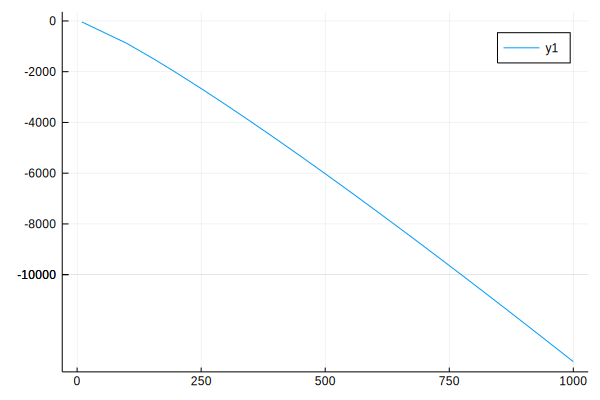

In [1077]:
plot(profit,0,1000)

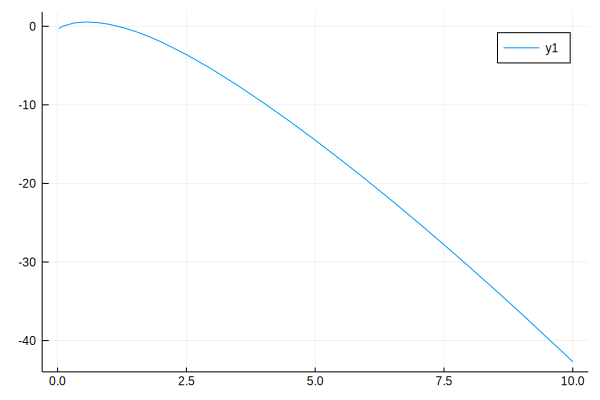

In [1078]:
plot(profit,0,10)

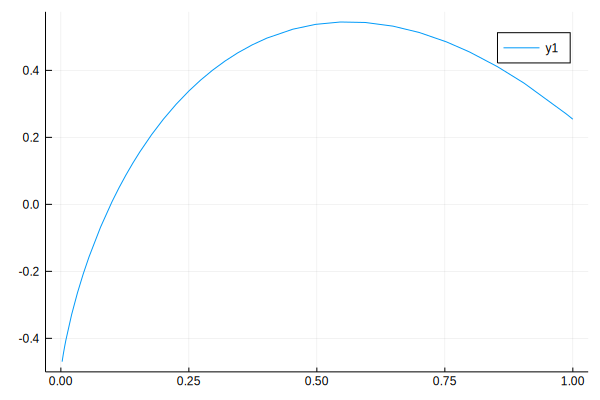

In [1079]:
plot(profit,0,1)

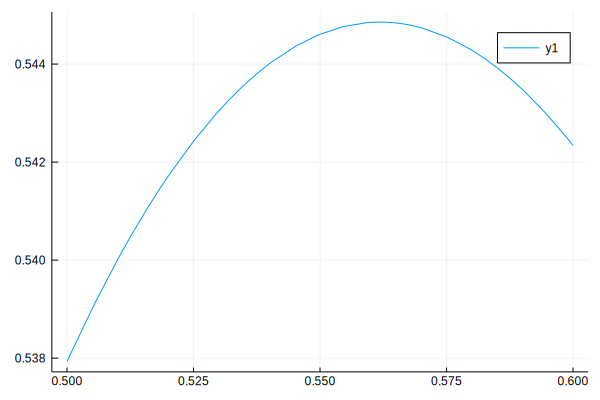

In [1080]:
plot(profit,0.5,0.6)

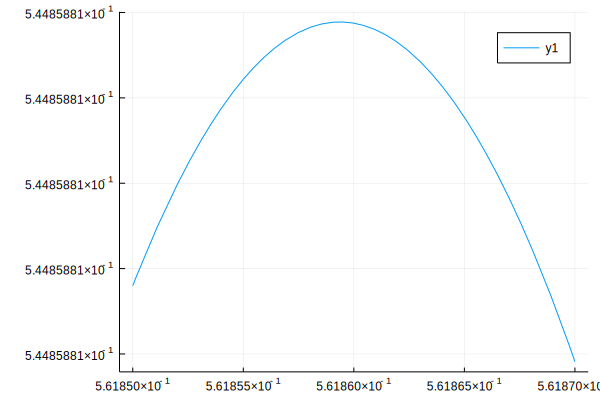

In [1081]:
plot(profit,0.56185,0.56187)

We now turn to the actual computation of the optimal value $q^*$, and for this sake we will use the 1-dimensional Gradient Descent (GD) algorithm:


In [1082]:
function grad_desc_1D(fun::Function, x_0::Float64 = 1., step::Float64 = 0.0001, stop::Float64 = 0.0000000001)
#function grad_desc_1V(fun, x_0 = 1, step = 0.1, stop = 0.00001)
    x = x_0
    grad = 10
    while abs(grad) > stop
        grad = (fun(x+step)-fun(x))/step
        x = x + grad*step
    end
    return x
end

grad_desc_1D (generic function with 4 methods)

In [1083]:
grad_desc_1D(profit)

0.5618093682442038

This approximated result $x^* = 0.561809$ fully makes sense in the context of our previous approximation.

---

## (modified) Solow model

This model tries to explain long-term productivity, its relation to productivity and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$)
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A$ is total factor productivity.
- capital depreciates at rate $\delta \in ]0,1[$. Its law of motion is $k_{t+1}=\delta k_{t}+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) = k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1[$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1[$ of income in every period, which is saved and invested in every period. In other words:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Calibrate parameters $\beta$, $\delta$ and $g$, that is, propose plausible values for them, from the litterature, or by matching some observable fact.__

We can find plausible values for $\beta$, $\delta$ and $g$ in the economic literature:

$$
\begin{align}
\beta &= 1- 0.1 = 0.9\\
\delta &= 1-0.05 = 0.95 \\
g &= 1-0.01 = 0.99 \\
\end{align}
$$

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

We detrend the equations of the model w.r.t. population growth and define $\hat y_t$, $\hat k_t$, $\hat c_t$ and $\hat i_t$ in the following manner:

$$
\begin{align}
\hat y_t &= \frac{y_t}{n_t} \\
\hat k_t &= \frac{k_t}{n_t} \\
\hat c_t &= \frac{c_t}{n_t} \\
\hat i_t &= \frac{i_t}{n_t} = \frac{sy_t}{n_t} = s\hat y_t
\end{align}
$$

Explicitly, $\hat y_t$ writes:
$$
\begin{align}
\hat y_t &= \frac{y_t}{n_t} \\
        &= \frac{AF(k_t,n_t)}{n_t} \\
        &= \frac{Ak_t^\alpha n_t^{1-\alpha}}{n_t} \\
        &= A\left(\frac{k_t}{n_t}\right)^\alpha \\
        &= A \hat k_t^\alpha
\end{align}
$$

And $\hat k_{t+1}$ writes:
$$
\begin{align}
\hat k_{t+1} &= \frac{k_{t+1}}{n_{t+1}} \\
             &= \frac{\delta k_t + i_t}{n_{t+1}} \\
             &= \frac{\delta k_t + sy_t}{n_{t}} \cdot \frac{n_{t}}{n_{t+1}}\\
             &= \frac{\delta \frac{k_t}{n_t} + s\frac{y_t}{n_t}}{g} \\
             &= \frac{\delta\hat k_t + s\hat y_t}{g} \\
             &= \frac{\delta\hat k_t + sA\hat k_t^\alpha}{g}
\end{align}
$$

And we have detrended the given equations with respect to population growth.

##### Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat k_t$__

In order to build such a function `f`, we also need to calibrate the parameters $\alpha$, $s$ and $A$. In the economic literature, is often said that $s = \frac{1}{3}$. For $\alpha$ the standard, mainstream model is to consider $F(k_t, n_t) = k_t^{\alpha} n_t^{1-\alpha}$ and so $\alpha = \frac{1}{2}$ and $A=1$.

We are now ready to implement this function:

In [1155]:
beta = 0.9
delta = 0.95
g = 0.99
alpha = 1/2
s = 1/3
A = 1

function f(kt_hat::Float64)
    return (1/g)*(delta*kt_hat +s*A*kt_hat^alpha)
end

f (generic function with 4 methods)

__Starting from an initial level $\hat{k}_0$ compute successive iterates of $f$ to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

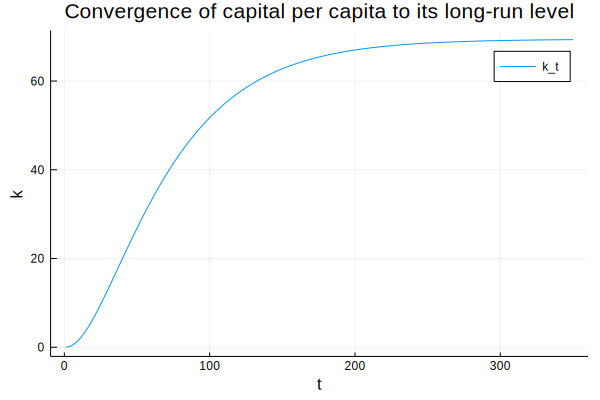

In [1210]:
k_hat_0 = 0.01
l = Float64[]
append!(l,k_hat_0)
for i = 1:349
    append!(l,f(l[i])) 
end
#print(l[350])
plot(1:350,l, title = "Convergence of capital per capita to its long-run level",ylabel = "k",xlabel="t",label="k_t")

We voluntarily chose a very low initial level $\hat{k}_0$ in order to have a nice-looking plot. No matter the initial level $\hat{k}_0$ that we choose, we end up at the same long-run level of capital per capita $\overline{k} = 69.33$.

__What factors affect the steady-state level of capital?__

At the steady state we have $\hat k_{t+1} = \hat k_{t} = \overline{k}$, meaning:

$$
\begin{align}
\overline{k} &= \frac{\delta \overline{k} + sA \overline{k}^\alpha}{g} \\
\overline{k} &= \overline{k} \frac{\delta + sA \overline{k}^{\alpha-1}}{g} \\
1 &= \frac{\delta + sA \overline{k}^{\alpha-1}}{g} \\
sA \overline{k}^{\alpha-1} &= g-\delta \\
\overline{k}^{\alpha-1} &= \frac{g-\delta}{sA} \\
\overline{k} &= \left( \frac{g-\delta}{sA} \right)^\frac{1}{\alpha-1} \\
\overline{k} &= \left( \frac{sA}{g-\delta} \right)^\frac{1}{1-\alpha}
\end{align}
$$

So we see that the factors affecting the steady-state level of capital per capita are $\delta, g, \alpha, s$ and $A$.

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

In [1223]:
beta = 0.9
delta = 0.95
g = 0.99
alpha = 1/2
s = 1/3
A = 1

function time_to_convergence(kt_hat_0::Float64=10.,beta_::Float64 = 0.9, delta_::Float64 = 0.95, g_::Float64 = 0.99, alpha_::Float64 = 1/2, s_::Float64 = 1/3, A_::Float64 = 1.)
    function f_cv(kt_hat_0::Float64=kt_hat_0)
        return (1/g_)*(delta_*kt_hat_0 +s_*A_*kt_hat_0^alpha_)
    end
    l = Float64[]
    append!(l,k_hat_0)
    for i = 1:999
        append!(l,f_cv(l[i])) 
        if abs(l[i+1]-l[i])<0.01
            return i,l[i]
            break
        end
    end
    return 1000,l[1000]
end

### format is t_c_c(kt_hat_0,beta,delta,g,   alpha,s  ,A)    
time_to_convergence(10.     ,0.9 ,0.95 ,0.99,1/2  ,1/3,1.)

(279, 68.95221844203377)

With this function defined we can now plot the time of convergence and steady-state value as each interesting parameter varies.

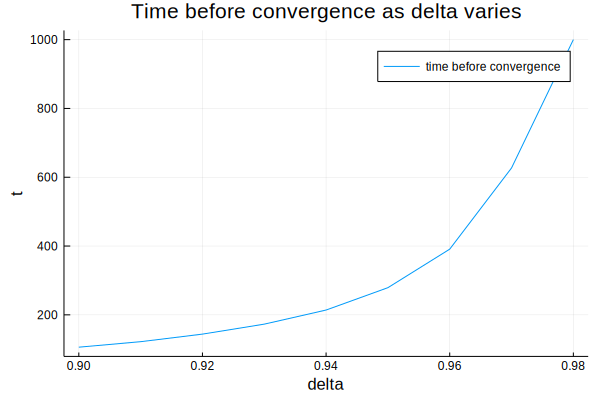

In [1227]:
l = Float64[]
for i = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98]
    append!(l,time_to_convergence(10.     ,0.9 ,i ,0.99,1/2  ,1/3,1.)[1]) 
end
#print(l[350])
plot([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98],l, title = "Time before convergence as delta varies",ylabel = "t",xlabel="delta",label="time before convergence")

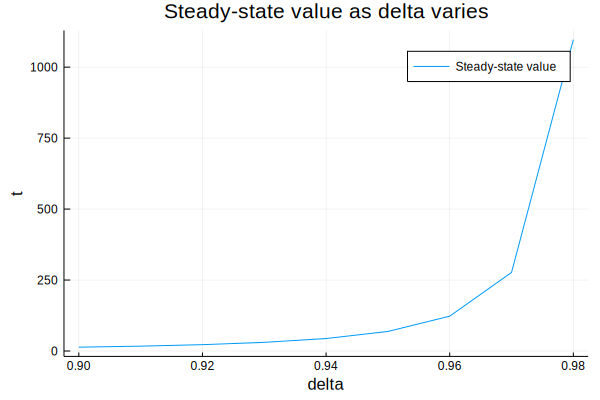

In [1240]:
l = Float64[]
for i = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98]
    append!(l,time_to_convergence(10.     ,0.9 ,i ,0.99,1/2  ,1/3,1.)[2]) 
end
#print(l[350])
plot([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98],l, title = "Steady-state value as delta varies",ylabel = "t",xlabel="delta",label="Steady-state value")

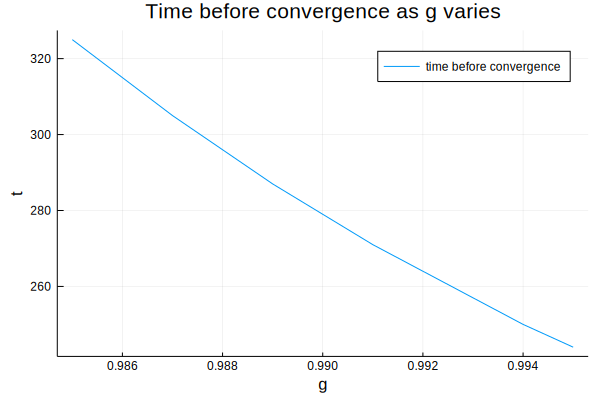

In [1236]:
l = Float64[]
for i = [0.985,0.986,0.987,0.988,0.989,0.99,0.991,0.992,0.993,0.994,0.995]
    append!(l,time_to_convergence(10.     ,0.9 ,0.95 ,i,1/2  ,1/3,1.)[1]) 
end
#print(l[350])
plot([0.985,0.986,0.987,0.988,0.989,0.99,0.991,0.992,0.993,0.994,0.995],l, title = "Time before convergence as g varies",ylabel = "t",xlabel="g",label="time before convergence")

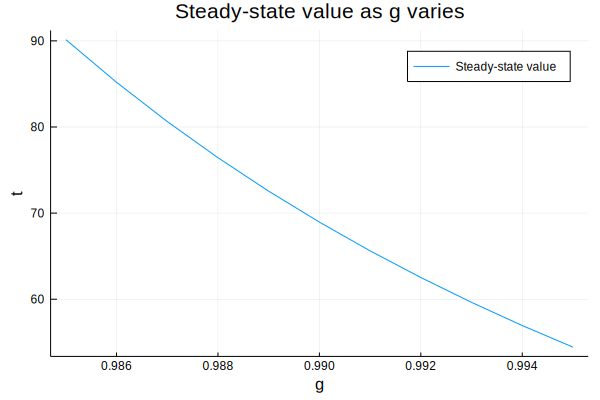

In [1241]:
l = Float64[]
for i = [0.985,0.986,0.987,0.988,0.989,0.99,0.991,0.992,0.993,0.994,0.995]
    append!(l,time_to_convergence(10.     ,0.9 ,0.95 ,i,1/2  ,1/3,1.)[2]) 
end
#print(l[350])
plot([0.985,0.986,0.987,0.988,0.989,0.99,0.991,0.992,0.993,0.994,0.995],l, title = "Steady-state value as g varies",ylabel = "t",xlabel="g",label="Steady-state value")

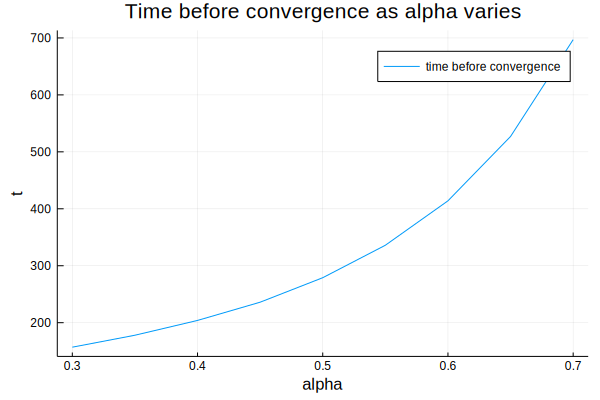

In [1247]:
l = Float64[]
for i = [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
    append!(l,time_to_convergence(10.     ,0.9 ,0.95 ,0.99,i  ,1/3,1.)[1]) 
end
#print(l[350])
plot([0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7],l, title = "Time before convergence as alpha varies",ylabel = "t",xlabel="alpha",label="time before convergence")

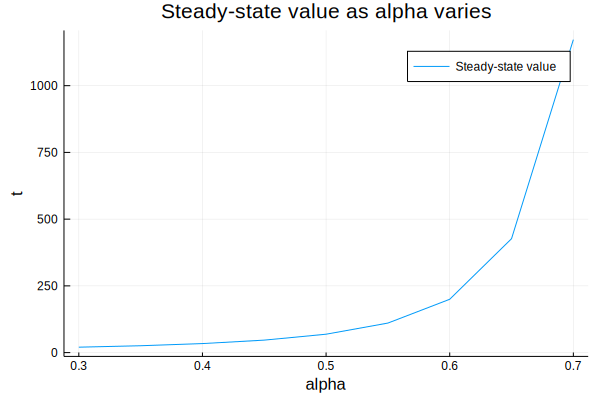

In [1250]:
l = Float64[]
for i = [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
    append!(l,time_to_convergence(10.     ,0.9 ,0.95 ,0.99,i  ,1/3,1.)[2]) 
end
#print(l[350])
plot([0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7],l, title = "Steady-state value as alpha varies",ylabel = "t",xlabel="alpha",label="Steady-state value")

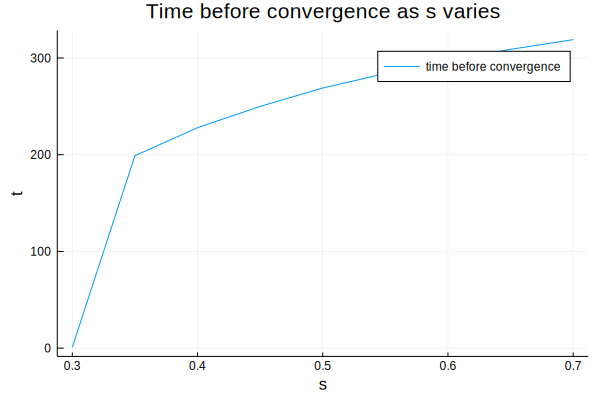

In [1245]:
l = Float64[]
for i = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
    append!(l,time_to_convergence(10.     ,0.9 ,0.95 ,0.99,1/2  ,i,1.)[1]) 
end
#print(l[350])
plot([0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7],l, title = "Time before convergence as s varies",ylabel = "t",xlabel="s",label="time before convergence")

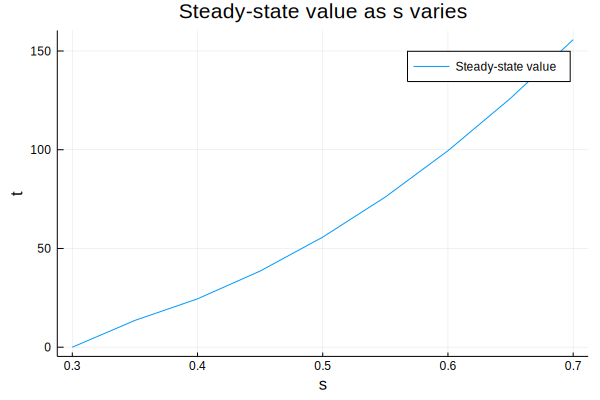

In [1249]:
l = Float64[]
for i = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
    append!(l,time_to_convergence(10.     ,0.9 ,0.95 ,0.99,1/2  ,i,1.)[2]) 
end
#print(l[350])
plot([0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7],l, title = "Steady-state value as s varies",ylabel = "t",xlabel="s",label="Steady-state value")

Our conclusion is that:

$$
\begin{align}
&\delta \text{ decreases the speed of convergence but increases the steady-state value} \\
&g \text{ increases the speed of convergence but decreases the steady-state value} \\
&\alpha \text{ decreases the speed of convergence but increases the steady-state value} \\
&s \text{ decreases the speed of convergence but increases the steady-state value}
\end{align}
$$

__Compute the steady-state directly using a Newton method and compare convergence speed.__

I am not sure I understand this question. In fact, if $k_t$ started decreasing at some point $t$, I could use Newton's algorithm to find the root $t^\star$ of the function $f$ defined by $f(t) = k_{t+1} - k{t}$. However $k_t$ is monotonous (increasing) so I can not do such a thing. If by Newton method we mean to find the optimum at which the slope of the function is sufficiently close to $0$ (good criterion for a steady-state), then it is pretty much what I did previously in order to find the time before $k_t$ converges depending on the parameters (cf my `time_to_convergence` function). The convergence speeds would then correspond to my previous results.

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

The goal would then be to find:

$$
\begin{align}
\underset{s}{argmax}\  \overline{c} &= \underset{s}{argmax}\  A(1-s) \overline{k}^\alpha \\
                                    &= \underset{s}{argmax}\  A(1-s)\left(\frac{sA}{g-\delta} \right)^{\frac{\alpha}{1-\alpha}} \\
                                    &=\underset{s}{argmax}\  (1-s)s^{\frac{\alpha}{1-\alpha}}
\end{align}
$$

Taking FOC with respect to s we must have:

$$
\begin{align}
\frac{\delta(1-s)s^{\frac{\alpha}{1-\alpha}}}{\delta s} &=0 \\
\frac{s^{\frac{1-2\alpha}{\alpha -1}}(s-\alpha)}{\alpha-1} &=0 \\
s &= \alpha
\end{align}
$$

Therefore we would choose the value $s = \alpha$

__(Bonus) Suppose an agent is given the intertemporal utility from the Ramsey–Cass–Koopmans model but chooses saving rate once for all. Which saving rate would one choose? Is it the same for all initial levels of capital?__



---

## Exercise: constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to minimize $f$ without constraint. Check you understand diagnositc information.__

We use __Optim.jl__ to minimize $f$.

In [1084]:
using Pkg; Pkg.add("Optim")

  Resolving package versions...
   Updating `~/Tous documents/Bachelor Polytechnique/Economics/ECO309 Computational Economics/3. eco309-master-2/Project.toml`
 [no changes]
   Updating `~/Tous documents/Bachelor Polytechnique/Economics/ECO309 Computational Economics/3. eco309-master-2/Manifest.toml`
 [no changes]


In [1085]:
using Optim
f(x) =  1.0 - (x[1]-0.5)^2 - (x[2]-0.3)^2 
result = optimize(f, zeros(2), BFGS())

 * Status: failure (line search failed)

 * Candidate solution
    Minimizer: [0.00e+00, 0.00e+00]
    Minimum:   -4.291403e+68

 * Found with
    Algorithm:     BFGS
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = NaN ≰ 0.0e+00
    |f(x) - f(x')|         = 4.29e+68 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.00e+00 ≰ 0.0e+00
    |g(x)|                 = 3.55e+34 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1
    f(x) calls:    51
    ∇f(x) calls:   51


Obviously, we get an error because th function decreases to $-\infty$ (the diagnostic information reports $-4*10^{68}$). If we want to maximize $f$ however, the tool __Optim.jl__ is perfect. We only have to minimize $f_{bis} = -f$, which we do hereafter:

In [1086]:
using Optim
f_bis(x) =  -(1.0 - (x[1]-0.5)^2 - (x[2]-0.3)^2)
result = optimize(f_bis, zeros(2), BFGS())

 * Status: success

 * Candidate solution
    Minimizer: [5.00e-01, 3.00e-01]
    Minimum:   -1.000000e+00

 * Found with
    Algorithm:     BFGS
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 5.00e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.00e+00 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.40e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.40e-01 ≰ 0.0e+00
    |g(x)|                 = 9.17e-12 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1
    f(x) calls:    3
    ∇f(x) calls:   3


This yields the predictable result  $x = 0.5$ and $y = 0.3$. Let us now minimize $f$ with our own coding, without and then with constraint:

In [1087]:
function f(x::Float64 = 1., y::Float64 = 1.)
    return 1-(x-0.5)^2 - (y-0.3)^2
    end;

**Minimizing** $f$ amounts to maximizing $(x-0.5)^2$ and $(y-0.3)^2$, which means $\|x\| = \infty $ and $\|y\| = \infty$. This does not have much interest. We assume the exercise is to **maximize** $f$. In this case we already know that maximizing it amounts to minimizing $(x-0.5)^2$ and $(y-0.3)^2$, which means $x = 0.5$ and $y = 0.3$. Let us verify this guess with a 2-dimensional Gradient-Descent Algorithm:

In [1088]:
function grad_desc_2D(fun::Function, x_0::Float64 = 1., y_0::Float64 = 1., step::Float64 = 0.0001, stop::Float64 = 0.0000000000001)
#function grad_desc_1V(fun, x_0 = 1, step = 0.1, stop = 0.00001)
    x = x_0
    y = y_0
    gradx = 10
    grady = 10
    while max(abs(gradx),abs(grady)) > stop
        gradx = (fun(x+step,y)-fun(x,y))/step
        grady = (fun(x,y+step)-fun(x,y))/step
        x = x + gradx*step
        y = y + grady*step
    end
    return x,y
end

grad_desc_2D (generic function with 5 methods)

In [1089]:
grad_desc_2D(f)

(0.4999500000004031, 0.29995000000040317)

This confirms our guess: $f$ is maximized for $x = 0.5$ and $y = 0.3$.

__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

Again our guess is that we want to minimize $(x-0.5)^2$ and $(y-0.3)^2$, but respecting the condition $x<0.3$ so this yields $x = 0.3- \epsilon$ with $\epsilon$ positive and very small, and $y = 0.3$. Let us verify this guess with a modified 2-dimensional Gradient-Descent Algorithm:

In [1090]:
function mod_grad_desc_2D(fun::Function, x_0::Float64 = 1., y_0::Float64 = 1., step::Float64 = 0.001, stop::Float64 = 0.00000001, epsilon = 0.00001)
#function grad_desc_1V(fun, x_0 = 1, step = 0.1, stop = 0.00001)
    x = x_0
    y = y_0
    gradx = 10
    grady = 10
    index = 0
    while (max(abs(gradx),abs(grady)) > stop) & (index < 100000)
        gradx = (fun(x+step,y)-fun(x,y))/step
        grady = (fun(x,y+step)-fun(x,y))/step
        # Here we don't allow x to go below 0.3
        x = min(0.3 - epsilon, x + gradx*step)
        y = y + grady*step
        index = index +1
    end
    return x,y
end

mod_grad_desc_2D (generic function with 6 methods)

In [1251]:
mod_grad_desc_2D(f)

(0.29999, 0.2995000000000205)

This confirms our guess: $x<0.3$ so this yields $x = 0.3- \epsilon$ with $\epsilon$ positive and very small, and $y = 0.3$.

__Reformulate the problem as a root finding with lagrangians. Write the complementarity conditions.__

Let us reformulate this problem as a root-finding problem with Lagrangians, we have:

$$
\begin{align}
f(x,y) &= 1-(x-0.5)^2-(y-0.3)^2 \\
       &= 1-x^2 +x-0.255-y^2+0.6y-0.09 \\
       &= 1-x^2 -y^2 +x +0.6y-0.36
\end{align}
$$
We want to maximize it with the constraint $x \leq0.3$, which we can write as the following Budget constraint:

$$
\\
\begin{align}
&p_xx +p_yy \leq B \\
&with \\
&\left\{
\begin{array}{rl}
p_x = 1 \\
p_y = 0 \\
B = 0.3
\end{array}
\right.
\end{align}
$$

This sets the context for the use of penalty fucntions and Lagragians: we want to choose $\lambda$ such that minimizing $f$ is aquivalent to minimizing the following function:

$$
V(x,y) := f(x,y) - \lambda(p_xx +p_yy - B)
$$

In order to solve this problem we use the so-called Karush-Kuhn-Tucker (KKT) conditions:

If $(x^\star, y^\star)$ is optimal, then there exists $\lambda$ such that:

$$
\begin{align}
\left\{
\begin{array}{rl}
&(x^\star, y^\star) \text{ is optimal for } V \\
&\lambda \geq 0 \text{ (Compementarity Condition 1) }\\
&\lambda(p_xx + p_yy -B) = 0 \text{ so here } \lambda (x-0.3) = 0 \text{ (Compementarity Condition 2) }
\end{array}
\right.
\end{align}
$$

Moreover we have the following First-Order Conditions (FOC):

$$
\begin{align}
f_x' - \lambda p_x =0 &\iff -2x +1-\lambda = 0 \\ &\iff \lambda = 1-2x \\
f_y' - \lambda p_y =0 &\iff -2y +0.6-\lambda = 0 \\ &\iff \lambda = \frac{0.6}{2} = 0.3 \\
\end{align}
$$

To sum up we have $y = 0.5$ and the following equations for $x$:
$$
\begin{align}
\left\{
\begin{array}{rl}
&\lambda \geq 0 \text{ (CC1) }\\
&\lambda (x-0.3) = 0 \text{ (CC2) } \\
&\lambda = 1-2x \text{ (FOC1) } \\
&x \leq 0.3 \text{ ("Budget Constraint") }
\end{array}
\right.
\end{align}
$$

These can be summarized as:

$$
\begin{align}
\left\{
\begin{array}{rl}
&1-2x \geq 0 \text{ (CC1) }\\
&(1-2x)(x-0.3) = 0 \text{ (CC2} \cap\text{FOC1) } \\
&x \leq 0.3 \text{ ("Budget Constraint") }
\end{array}
\right.
\end{align}
$$

And so:
$$
\begin{align}
\left\{
\begin{array}{rl}
&x \in \ \{0.3,0.5\} \text{ (CC2} \cap\text{FOC1) }\\
&x \leq 0.3 \text{ ("Budget Constraint") }
\end{array}
\right.
\end{align}
$$

This yields $x=0.3$, as predicted. In the end we thus have $x=0.3, y = 0.3$.

__Solve using NLSolve.jl__

Intuitively, if we use it in 2 dimensions, the solver __NLSolve.jl__ will find the root $(\hat{x},\hat{y})$ of a function $f!: \mathbb{R}^2 \rightarrow \mathbb{R}^2$. We need to give $f!$ to the solver, but also its partial derivatives with respect to each variables, stored in the Jacobian of $f$. Where we need to be smart is we need to find a $f!$ which incorporates the KKT conditions such that the root of $f!$ is the otpimum of f under the constraint $x\leq0.3$. Moreover, $f!$ must admit partial derivatives with respect to each variable.

We construct $f! = (f!_1,f!_2)$ in the following manner:

$f!_2(x,y)$ must be zero when (FOC2) is respected, i.e. when $f_y' - \lambda p_y =0$, meaning $-2y + 0.6 = 0$. We thus define $$f!_2(x,y) := -2y + 0.6$$.

$f!_1(x,y)$ must be zero when (FOC1), (CC2) and BC) are respected, i.e. when $f_x' - \lambda p_x =0$, (meaning $\lambda = 1-2x$), $\lambda x(x-0.3) = 0$ and $x\leq 0.3$. We thus define:

$$
\begin{align}
f!_1(x,y) &:= (1-2x)(x-0.3)max(0,x-0.3) \\
         &= -(1-2x)(x-0.3)min(0,0.3-x)
\end{align}
$$
But we are only interested in it being $0$ and since we want a smooth funtion, we use the trick learnt in class and replace the $min$ by the __Fisher-Burmeister function__, and then redefine $f!_1$:

$$
\begin{align}
f!_1(x,y) &:= (2x-1)(x-0.3) \phi (0,0.3-x) \\
         &= (2x-1)(x-0.3)\left(0+0.3-x - \sqrt{0^2 + (0.3-x)^2}\right) \\
         &= (2x-1)(x-0.3)\left(0.3-x - \sqrt{(0.3-x)^2}\right)
\end{align}
$$

We must now compute the elements of the Jacobian of $f!$, meaning its partial derivatives with respect to each variable:
$$
\begin{align}
f!_1(x,y) &= (2x-1)(x-0.3)\left(0.3-x - \sqrt{(0.3-x)^2}\right) \\
          &= (2x-1)(x-0.3)(0.3-x) - (2x-1)(x-0.3)\sqrt{(0.3-x)^2} \\
          &= -2x^3 +2.2x^2 -0.78x + 0.09 - (2x^2 - 1.6x +0.3)\sqrt{(0.3-x)^2}\\
\end{align}
$$
And therefore:

$$
\begin{align}
\frac{\delta f!_1(x,y)}{\delta x} &= \frac{\delta}{\delta x} \left(-2x^3 +2.2x^2 -0.78x + 0.09 - (2x^2 - 1.6x +0.3)\sqrt{(0.3-x)^2}\right)\\
   &= -6x^2 +4.4x -0.78 - (4x - 1.6)\sqrt{(0.3-x)^2} +(2x^2 - 1.6x +0.3)\frac{0.3-x}{\sqrt{(x-0.3)^2}} \\
\frac{\delta f!_1(x,y)}{\delta y} &= 0 \\
\frac{\delta f!_2(x,y)}{\delta x} &= 0\\
\frac{\delta f!_2(x,y)}{\delta y} &= -2
\end{align}
$$

We are now ready to code $f!$ and its Jacobian and to solve the problem using __NLSolve.jl__:

In [1092]:
using NLsolve

function f!(F, x)
    F[1] = (2*x[1]-1)*(x[1]-0.3)*(0.3-x[1]-sqrt((0.3-x[1])^2))
    F[2] = -2*x[2] +0.6
end

function j!(J, x)
    J[1, 1] = -6*x[1]^2 + 4.4*x[1]- (4*x[1]-1.6)*sqrt((0.3-x[1])^2) + (2*x[1]^2 -1.6*x[1] +0.3)*(0.3-x[1])/sqrt((0.3-x[1])^2)
    J[1, 2] = 0
    J[2, 1] = 0
    J[2, 2] = -2
end

nlsolve(f!, j!, [ 10.; 10.])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [10.0, 10.0]
 * Zero: [0.3005984507957437, 0.3]
 * Inf-norm of residuals: 0.000000
 * Iterations: 1000
 * Convergence: false
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: false
 * Function Calls (f): 65
 * Jacobian Calls (df/dx): 65

__HURRAY!!__ This works! We obtain the same result $x=y=0.3$ as previously with all of these super-complicated conditions transformed into terms that the __NLSolve.jl__ solver can understand.

---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

The Karush-Kuhn-Tucker theorem tells us that if $({c_1}^\star, {c_2}^\star)$ is optimal for $U$, then, necessarily, there exists $\lambda \in \mathbb{R}$ such that:

$$
\begin{align}
({c_1}^\star, {c_2}^\star) \text{ maximizes } &U({c_1},{c_2}) - \lambda ({p_1}{c_1}+p_2{c_2} -I) \\
\lambda &\geq 0 \text{ (CC1) }\\
\lambda({p_1}{c_1}+p_2{c_2}-I) &=0 \text{ (CC2) }\\
\frac{\delta U({c_1},{c_2})}{\delta {c_1}}-\lambda {p_1} &=0 \text{ (FOC1) }\\
\frac{\delta U({c_1},{c_2})}{\delta c_2}-\lambda p_2 &=0 \text{ (FOC2) }\\
\end{align}
$$

In this precise case they write:

$$
\begin{align}
({c_1}^\star, {c_2}^\star) \text{ maximizes } &\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2) - \lambda ({p_1}{c_1}+p_2{c_2} -I) \\
\lambda &\geq 0 \text{ (CC1) }\\
\lambda({p_1}{c_1}+p_2{c_2}-I) &=0 \text{ (CC2) }\\
\frac{\beta_1}{c_1-\gamma_1}-\lambda {p_1} &=0 \text{ (FOC1) }\\
\frac{\beta_2}{c_2-\gamma_2}-\lambda p_2 &=0 \text{ (FOC2) }\\
\end{align}
$$



__Verify the KKT conditions are sufficient for optimality.__

Assume that the KKT conditions are verified. Since by (CC2) we have $\lambda({p_1}{c_1}+p_2{c_2}-I) =0$, we have three cases to consider:

__case 1: $\lambda =0$__ 

In this case we have a very easy way to see optimality: by (FOC1) and (FOC2) we see that $\frac{\delta U({c_1},{c_2})}{\delta c_1} = \frac{\delta U({c_1},{c_2})}{\delta c_2} =0$ and thus at this point we have $\nabla U =0$, meaning we reached an optimum. This case cannot happen in our example since the utility function in stictly increasing in each variable and since the price of each good is strictly positive. Indeed the Budget Constraint must thus be binding and in fact we always have $\frac{\delta U({c_1},{c_2})}{\delta c_1} >0$ and $\frac{\delta U({c_1},{c_2})}{\delta c_2} >0$.

__case 2: ${p_1}{c_1}+p_2{c_2}-I =0, \lambda >0$__ 

In this case we see that "the whole budget is used", which is necessary since the utility function in stictly increasing in each variable and since the price of each good is strictly positive. The other necessary condition we need (__together__, they are a sufficient condition for optimality) is that the money unit spent on the last unit of good $c_1$ yields the same (positive) utility as the money unit spent on the last unit of good $c_2$. This means $\frac{\delta U({c_1},{c_2})}{p_1\delta {c_1}} = \frac{\delta U({c_1},{c_2})}{p_2\delta {c_2}}$. But thanks to (FOC1) and (FOC2) we exactly know that this is the case since $\frac{\delta U({c_1},{c_2})}{p_1\delta {c_1}} = \lambda = \frac{\delta U({c_1},{c_2})}{p_2\delta {c_2}} \geq 0$. We thus have optimality.

__Derive analytically the demand functions, and the shadow price.__

Let us derive analytically the demand functions:

We shall use the Budget Constraint (BC) to write $c_2$ as a function of $c_1$, and plug it into the equation $\frac{\beta_1}{p_1(c_1-\gamma_1)}=\frac{\beta_2}{p_2(c_2-\gamma_2)}$ which comes from the association of (FOC1) and (FOC2).

Explicitly this gives:

$$
c_2 = \frac{I-p_1c_1}{p_2} \text{ (BC)}
$$

And

$$
\begin{align}
\frac{\beta_1}{p_1(c_1-\gamma_1)}&=\frac{\beta_2}{p_2(c_2-\gamma_2)} \\
\frac{p_1(c_1-\gamma_1)}{\beta_1}&=\frac{p_2(c_2-\gamma_2)}{\beta_2} \\
c_1-\gamma_1&=\frac{p_2\beta_1}{p_1\beta_2}(c_2-\gamma_2) \\
c_1&=\frac{p_2\beta_1}{p_1\beta_2}\left(\frac{I-p_1c_1}{p_2}-\gamma_2\right) + \gamma_1\\
c_1&=\frac{\beta_1}{p_1\beta_2}\left(I-p_1c_1-p_2\gamma_2\right) + \gamma_1\\
c_1&=\frac{\beta_1}{\beta_2}\left(-c_1+\frac{I-p_2\gamma_2}{p_1}\right) + \gamma_1\\
c_1\left( 1+\frac{\beta_1}{\beta_2} \right)&=\frac{\beta_1}{\beta_2}\left(\frac{I-p_2\gamma_2}{p_1}\right) + \gamma_1\\
c_1&=\frac{\beta_1}{\beta_1 +\beta_2}\left( \frac{\beta_1}{\beta_2}\left(\frac{I-p_2\gamma_2}{p_1}\right) + \gamma_1\right)\\
c_1&=\frac{\beta_1}{\beta_1 +\beta_2}\left(\frac{I-p_2\gamma_2}{p_1}\right) + \frac{\beta_2}{\beta_1 +\beta_2}\gamma_1 \\
\end{align}
$$

And symmetrically, we get the following expression for $c_2$:

$$
\begin{align}
c_2&=\frac{\beta_2}{\beta_1 +\beta_2}\left(\frac{I-p_1\gamma_1}{p_2}\right) + \frac{\beta_1}{\beta_1 +\beta_2}\gamma_2 \\
\end{align}
$$

Let us now turn to the computation of the Shadow Price $SP$:

$$
\begin{align}
SP &:= \lambda = \frac{\delta U(c_1,c_2)}{p_1 \delta c_1}= \frac{\delta U(c_1,c_2)}{p_2 \delta c_2} \\
   &= \frac{\beta_1}{(c_1 - \gamma_1)p_1} \\
   &= \frac{\beta_1}{\left(\frac{\beta_1}{\beta_1 +\beta_2}\left(\frac{I-p_2\gamma_2}{p_1}\right) + \frac{\beta_2}{\beta_1 +\beta_2}\gamma_1 - \gamma_1\right)p_1} \\
   &= \frac{\beta_1}{\frac{\beta_1}{\beta_1 +\beta_2}(I-p_2\gamma_2) + \frac{\beta_2}{\beta_1 +\beta_2}\gamma_1p_1 - \gamma_1p_1} \\
   &= \frac{\beta_1}{I \left(\frac{\beta_1}{\beta_1 +\beta_2}\right)-\frac{\beta_1}{\beta_1 +\beta_2}(p_2\gamma_2) -\frac{\beta_1}{\beta_1 +\beta_2}(p_1\gamma_1)} \\
   &= \frac{\beta_1+\beta_2}{I-p_1\gamma_1-p_2\gamma_2}
\end{align}
$$



__Interpret this problem as a complementarity problem and solve it using NLSolve__

The __mpc__ function (for Mixed Complementarity Problem) of NLSolve is extraordinarily well-suited for this kind of problem:

If for a given consumption value $c_1$ of good $1$, the consumer gets the marginal utility per unit of money whether she buys an additional unit of good $1$ or of good $2$, that is, $\frac{\delta U({c_1},{c_2})}{p_1\delta {c_1}} = \frac{\delta U({c_1},{c_2})}{p_2\delta {c_2}}$ , then it means she found the optimal $c_1$ (and by deduction, the right $c_2 = \frac{I-p_1c_1}{p_2}$).

However, she also found the optimal $c_1$ if she spent all her budget on good $1$ (that is, $c_1 = \frac{I}{p_1}$) and still gets a higher marginal utility per unit of money from buying an additional unit of good $1$ than from buying an additional unit of good $2$ (that is, $\frac{\delta U({c_1},{c_2})}{p_1\delta {c_1}} > \frac{\delta U({c_1},{c_2})}{p_2\delta {c_2}}$).

Symmetrically, she also found the optimal $c_1$ if she spent all her budget on good $2$ (that is, $c_1 = 0$) and still gets a higher marginal utility per unit of money from buying an additional unit of good $2$ than from buying an additional unit of good $1$ (that is, $\frac{\delta U({c_1},{c_2})}{p_1\delta {c_1}} < \frac{\delta U({c_1},{c_2})}{p_2\delta {c_2}}$).

We can therefore define the following function $f$ and the following $a$ and $b$:

$$
\begin{align}
f(c_1) &= \frac{\beta_1}{(c_1-\gamma_1)p_1} - \frac{\beta_2}{\left(\frac{I-p_1c_1}{p_2}-\gamma_2\right)p_2} \\
a&=\frac{I}{p_1} \\
b&=0
\end{align}
$$

So that the __mpc__ function of NLSolve will return us a value for $c_1$ such that one of the three conditions is satisfied:
$$
\begin{align}
f(c_1) &= 0 \text{ and } c_1 \in \left[0,\frac{I}{p_1}\right] \\
f(c_1) &> 0 \text{ and } c_1 = \frac{I}{p_1} \\
f(c_1) &< 0 \text{ and } c_1 = 0 
\end{align}
$$

Which is exactly what we want. We code this for the following values of $I, p_1, p_2, \gamma_1, \gamma_2, \beta_1, \beta_2$:

$$
\begin{align}
I &= 100 \\
p_1 &= 1 \\
p_2 &= 3 \\ 
\gamma_1 &= 5 \\
\gamma_2 &= 5 \\ 
\beta_1 &= 4 \\
\beta_2 &= 1 \\ 
\end{align}
$$

In [1143]:
I = 100
p1 = 1
p2 = 3
gam1 = 5
gam2 = 5
bet1 = 4
bet2 = 1

using NLsolve

function f!(F, x)
    F[1]= bet1/((x[1]-gam1)*p1) - bet2/(((I-p1*x[1])/p2-gam2)*p2)
end

r = mcpsolve(f!, [0.],[I/p1],
             [I/(2*p1)], reformulation = :smooth, autodiff = :forward)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [50.0]
 * Zero: [69.00000165119829]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__



In order to produce isoutility curves we need to use the formula for utility:

$$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$$

We fix a level $\overline{U}$ of utility and write the $c_1$ that yields the same utility $\overline{U}$, as function of $c_2$. Explicitly we have:

$$
\begin{align}
\overline{U} &=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2) \\
\beta_1 \log(c_1-\gamma_1)&=\overline{U} - \beta_2 \log(c_2-\gamma_2)\\
\log(c_1-\gamma_1)&=\frac{\overline{U} - \beta_2 \log(c_2-\gamma_2}{\beta_1 }\\
c_1-\gamma_1&=e^{\frac{\overline{U} - \beta_2 \log(c_2-\gamma_2)}{\beta_1 }}\\
c_1&=e^{\frac{\overline{U} - \beta_2 \log(c_2-\gamma_2)}{\beta_1 }}+\gamma_1\\
\end{align}
$$

For the budget constraint, we simply write:
$$
c_1 = \frac{I-p_2c_2}{p_1}
$$

In [1153]:
using Plots
using NLsolve

#These parameters can be modified as long as utility is not minus infinity, meaning we must have I>p1*gam2 + p2*gam2 
I = 100
p1 = 1
p2 = 3
gam1 = 5
gam2 = 5
bet1 = 4
bet2 = 1

function f!(F, x)
    F[1]= bet1/((x[1]-gam1)*p1) - bet2/(((I-p1*x[1])/p2-gam2)*p2)
end

r = mcpsolve(f!, [0.],[I/p1],
             [I/(2*p1)], reformulation = :smooth, autodiff = :forward)

c1_opt = r.zero[1]
c2_opt = (I-p1*c1_opt)/p2

#To obtain the isoutility curve that goes through the optimal consumption bundle (c1_opt,c2_opt):
Ubar = bet1*log(c1_opt-gam1) + bet2*log(c2_opt-gam2)

l1 = Float64[]
for c2 = 0:I/p2
    c1 = (I-p2*c2)/p1
    append!(l1,c1)
end

l2 = Float64[]
for c2 = 0:I/p2
    if c2>gam2
        c1 = min(exp((Ubar-bet2*log(c2-gam2))/bet1)+gam1,1.5*I/p1)
        else
        c1 = 1.5*I/p1
    end
    append!(l2,c1)
end 

print("The optimal consumption bundle (c1,c2) is : ( ", r.zero[1]," , ",(I-p1*r.zero[1])/p2," )")

x = Float64[]
for c2 = 0:I/p2
    append!(x,c2)
end

The optimal consumption bundle (c1,c2) is : ( 69.00000165119829 , 10.333332782933903 )

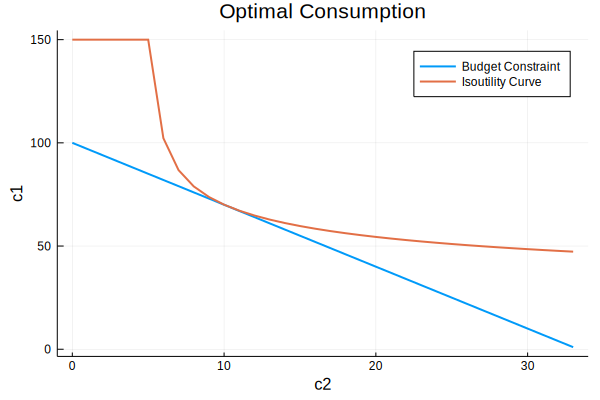

In [1154]:
plot(x,[l1,l2],title = "Optimal Consumption",xlabel = "c2",ylabel = "c1",label = ["Budget Constraint" "Isoutility Curve"], lw = 2)

We can play with the parameters and always find the optimal consumtion bundle (as long as utility is not minus infinity, meaning we must have $I>p_1\gamma_1 + p_2\gamma_2$). Notice that the horizontal part if the isoutility curve should be omitted, I truncated it at $1.5$ times the budget contraint for $c_1$ alone so that the plot would look nice and be well-centered.